<a href="https://colab.research.google.com/github/BarryFoles/assignment1_123456789/blob/main/CS4287_Prj1_20236263_20244053.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Darragh Walsh 20244053/Barry Foley 20236263
#Code Working = N

#Dataset Error

In [20]:
#For processing dataset
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Model

#For Plotting dataset and model
import seaborn as sb
import matplotlib.pyplot as plt

#Importing Necessary Libraries
from IPython.display import display

# For creating and training model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout

# For cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import TfidfVectorizer  # For text vectorization
from sklearn.neural_network import MLPClassifier


#Dataset Importation and Pre-Processing

In [21]:
dataset_path = "space_travellers.csv"
df = pd.read_csv(dataset_path)

In [22]:
display(df.head())

,#,Name,Nationality,Date,Flight
0,1,Yuri Gagarin,Soviet Union,1961-04-12,Vostok 1
1,2,Alan Shepard,United States,1961-05-05,Freedom 7
2,3,Virgil Grissom,United States,1961-07-21,Liberty Bell 7
3,4,Gherman Titov,Soviet Union,1961-08-06,Vostok 2
4,5,John Glenn,United States,1962-02-20,Friendship 7


In [23]:
display(df.describe())

,#
count,643.000000
mean,322.000000
std,185.762393
min,1.000000
25%,161.500000
50%,322.000000
75%,482.500000
max,643.000000


#Data Visualisation

In [24]:
# Displaying the shape of the data, 10 features and 3276 samples
df.shape

(643, 5)

In [25]:
print(df.isnull().sum())

#              0
Name           0
Nationality    0
Date           0
Flight         0
dtype: int64


In [26]:
import pandas as pd

# Split the "Name" column into first names, middle names, and last names.
split_names = df['Name'].str.split()

# Created separate lists for first names, middle names, and last names.
first_names = []
middle_names = []
last_names = []

for names in split_names:
    if len(names) == 1:
        first_names.append(names[0])
        middle_names.append(None)
        last_names.append(None)
    elif len(names) == 2:
        first_names.append(names[0])
        middle_names.append(None)
        last_names.append(names[1])
    else:
        first_names.append(names[0])
        middle_names.append(names[1])
        last_names.append(names[-1])

# Added the new columns to the DataFrame.
df['First Name'] = first_names
df['Middle Name'] = middle_names
df['Last Name'] = last_names

# Display the resulting DataFrame.
print(df)



       #                Name    Nationality        Date          Flight  \
0      1        Yuri Gagarin   Soviet Union  1961-04-12        Vostok 1   
1      2        Alan Shepard  United States  1961-05-05       Freedom 7   
2      3      Virgil Grissom  United States  1961-07-21  Liberty Bell 7   
3      4       Gherman Titov   Soviet Union  1961-08-06        Vostok 2   
4      5          John Glenn  United States  1962-02-20    Friendship 7   
..   ...                 ...            ...         ...             ...   
638  639         Gui Haichao          China  2023-05-30     Shenzhou 16   
639  640     Jasmin Moghbeli  United States  2023-08-26   SpaceX Crew-7   
640  641  Konstantin Borisov         Russia  2023-08-26   SpaceX Crew-7   
641  642        Nikolai Chub         Russia  2023-09-15     Soyuz MS-24   
642  643        Loral O'Hara  United States  2023-09-15     Soyuz MS-24   

     First Name Middle Name Last Name  
0          Yuri        None   Gagarin  
1          Alan    

In [27]:
display(df.head())

,#,Name,Nationality,Date,Flight,First Name,Middle Name,Last Name
0,1,Yuri Gagarin,Soviet Union,1961-04-12,Vostok 1,Yuri,None,Gagarin
1,2,Alan Shepard,United States,1961-05-05,Freedom 7,Alan,None,Shepard
2,3,Virgil Grissom,United States,1961-07-21,Liberty Bell 7,Virgil,None,Grissom
3,4,Gherman Titov,Soviet Union,1961-08-06,Vostok 2,Gherman,None,Titov
4,5,John Glenn,United States,1962-02-20,Friendship 7,John,None,Glenn


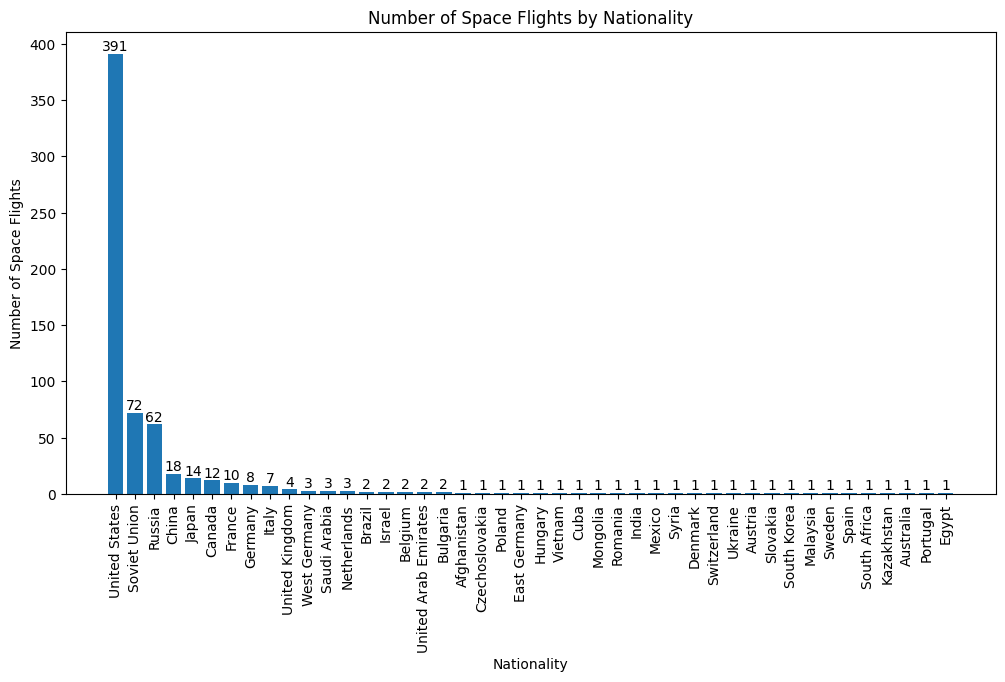

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

nationality_counts = df['Nationality'].value_counts().reset_index()
nationality_counts.columns = ['Nationality', 'Number of Flights']

# Sorted the data by the number of flights.
nationality_counts = nationality_counts.sort_values(by='Number of Flights', ascending=False)

plt.figure(figsize=(12, 6))
bars = plt.bar(nationality_counts['Nationality'], nationality_counts['Number of Flights'])
plt.xlabel('Nationality')
plt.ylabel('Number of Space Flights')
plt.xticks(rotation=90)

# Added the number of flights as text labels above each bar.
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), int(bar.get_height()), ha='center', va='bottom')

plt.title('Number of Space Flights by Nationality')
plt.show()

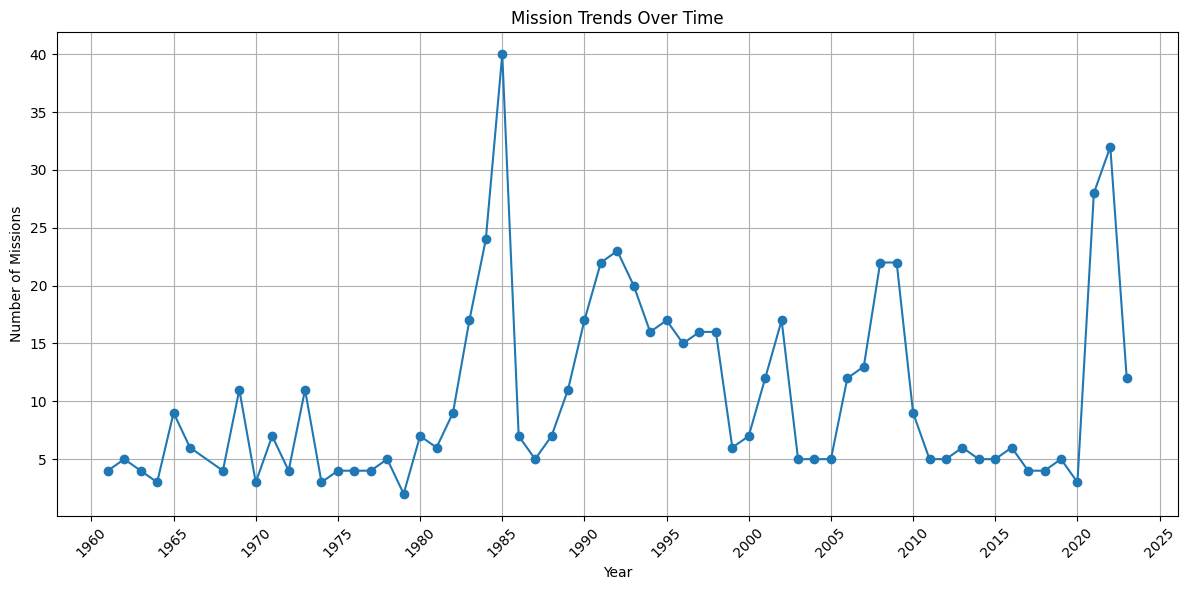

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Grouped the data by the 'Date' column and counted the number of missions for each year.
missions_over_time = df.groupby(pd.to_datetime(df['Date']).dt.year)['Flight'].count()

# Created a time series plot.
plt.figure(figsize=(12, 6))
missions_over_time.plot(marker='o', linestyle='-')

# Set labels and title.
plt.xlabel('Year')
plt.ylabel('Number of Missions')
plt.title('Mission Trends Over Time')

# Set the x-axis ticks at 5-year intervals.
start_year = 1960
end_year = 2025
plt.xticks(range(start_year, end_year + 1, 5), rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()

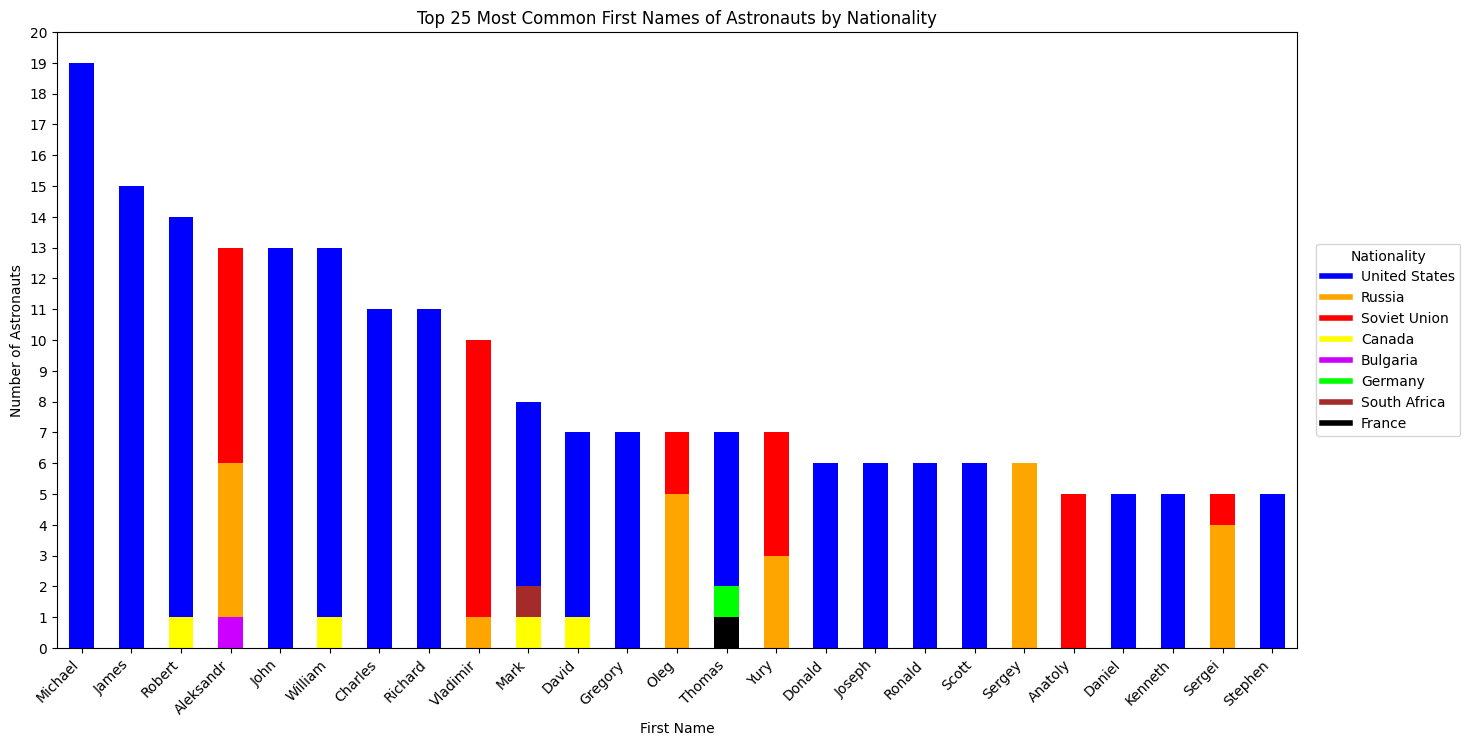

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

nationality_colors = {
    'United States': 'blue',
    'Russia': 'orange',
    'Soviet Union': 'red',
    'Canada': 'yellow',
    'Bulgaria': (0.8, 0, 1.0),  # Vivid bright purple in RGB.
    'Germany': (0, 1, 0),  # Vivid bright green in RGB.
    'South Africa': 'brown',
    'France': 'black',
}

# Grouped the data by 'First Name' and 'Nationality' and counted the number of astronauts in each group.
grouped_data = df.groupby(['First Name', 'Nationality']).size().unstack(fill_value=0)

# Got the top 25 most common first names of astronauts.
top_first_names = grouped_data.sum(axis=1).nlargest(25).index

# Filtered the data to include only the top 25 most common first names and their associated nationalities.
grouped_data = grouped_data.loc[top_first_names]

# Created a bar chart for each first name.
fig, ax = plt.subplots(figsize=(16, 8))  # Created a subplot.
grouped_data.plot(kind='bar', stacked=True, ax=ax, color=[nationality_colors.get(n, 'gray') for n in grouped_data.columns])

# Set labels and title.
ax.set_xlabel('First Name')
ax.set_ylabel('Number of Astronauts')
ax.set_title('Top 25 Most Common First Names of Astronauts by Nationality')

# Improved spacing between bars and rotated the x-axis labels for better readability.
plt.xticks(rotation=45, ha='right')

# Set y-axis markings from 0 to 20 with markings at every integer value.
plt.yticks(range(21))

# Created a separate legend to indicate nationality colors.
legend_colors = [plt.Line2D([0], [0], color=color, lw=4) for color in nationality_colors.values()]
legend_labels = nationality_colors.keys()

# Added the nationality legend outside of the chart.
plt.legend(legend_colors, legend_labels, title='Nationality', loc='center left', bbox_to_anchor=(1.01, 0.5))

plt.show()

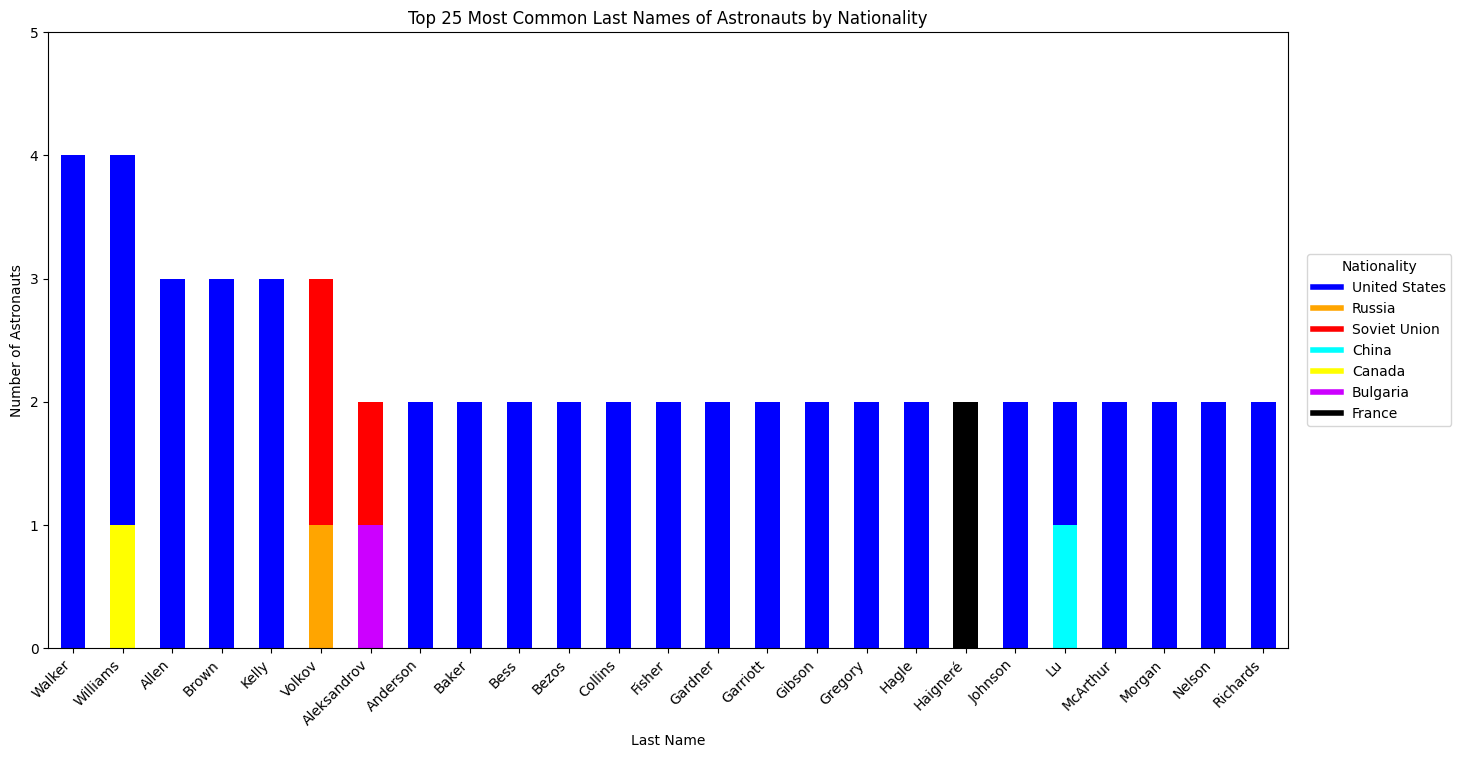

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

nationality_colors = {
    'United States': 'blue',
    'Russia': 'orange',
    'Soviet Union': 'red',
    'China':  'cyan',
    'Canada': 'yellow',
    'Bulgaria': (0.8, 0, 1.0),  # Vivid bright purple in RGB.
     'France': 'black',
}

#Grouped the data by 'Last Name' and 'Nationality' and counted the number of astronauts in each group.
grouped_data = df.groupby(['Last Name', 'Nationality']).size().unstack(fill_value=0)

#Got the top 25 most common last names of astronauts.
top_last_names = grouped_data.sum(axis=1).nlargest(25).index

#Filtered the data to include only the top 25 most common last names and their associated nationalities.
grouped_data = grouped_data.loc[top_last_names]

#Created a bar chart for each last name.
fig, ax = plt.subplots(figsize=(16, 8))  #Created a subplot.
grouped_data.plot(kind='bar', stacked=True, ax=ax, color=[nationality_colors.get(n, 'gray') for n in grouped_data.columns])

#Set labels and title.
ax.set_xlabel('Last Name')
ax.set_ylabel('Number of Astronauts')
ax.set_title('Top 25 Most Common Last Names of Astronauts by Nationality')

#Improved spacing between bars and rotated the x-axis labels for better readability.
plt.xticks(rotation=45, ha='right')

#Set y-axis markings from 0 to 20 with markings at every integer value.
plt.yticks(range(6))

#Created a separate legend to indicate nationality colors.
legend_colors = [plt.Line2D([0], [0], color=color, lw=4) for color in nationality_colors.values()]
legend_labels = nationality_colors.keys()

#Added the nationality legend outside of the chart.
plt.legend(legend_colors, legend_labels, title='Nationality', loc='center left', bbox_to_anchor=(1.01, 0.5))

plt.show()

#Model Definition

In [32]:
# Shuffled the data for randomness.
df = df.sample(frac=1)

# Split the data into features (X) and target (y).
X = df['Name'].values  # Astronaut names
y = df['Nationality'].values  # Nationalities

# Encoded the target variable (nationality) into numerical labels.
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data (names)
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed
X_train = tfidf_vectorizer.fit_transform(X_train)
X_test = tfidf_vectorizer.transform(X_test)

# Initialize and train the MLP classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
mlp_classifier.fit(X_train, y_train)

# Evaluate the model on the test data
accuracy = mlp_classifier.score(X_test, y_test)

print(f"Accuracy on test data: {accuracy:.2f}")

Accuracy on test data: 0.74


In [33]:
# Displaying the split data dimensions
display(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# Setting input dimension
input_dim = X_train.shape[1]

(514, 792)

(514,)

(129, 792)

(129,)

In [34]:
# Defining hyperparameters
EPOCHS = 500
BATCH_SIZE = 16
VALIDATION_SPLIT = 0.2
OPTIMISER = 'adam'
LOSS_FUNCTION = 'binary_crossentropy'

In [35]:
from keras.callbacks import EarlyStopping

#Defining the model
model = Sequential(name='multilayer_perceptron')

#Adding Input, Hidden and Output Layers
model.add(Dense(128, activation='relu', input_dim=13 , name='input_layer'))
model.add(Dropout(0.5))  #Add dropout layer with a dropout rate of 0.5
model.add(Dense(64, activation='relu', name='hidden_layer_1'))
model.add(Dropout(0.5))  #Add dropout layer with a dropout rate of 0.5
model.add(Dense(1, activation='sigmoid', name='output_layer'))  #Binary classification with a sigmoid activation function

#Compiling the model
#Adam chosen as the optimiser
#Binary_crossentropy as the loss function
model.compile(optimizer=Adam(learning_rate=0.0001), loss=LOSS_FUNCTION, metrics=['accuracy'])

#Displaying summary of model
model.summary()

Model: "multilayer_perceptron"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 128)               1792      
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 hidden_layer_1 (Dense)      (None, 64)                8256      
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 output_layer (Dense)        (None, 1)                 65        
                                                                 
Total params: 10113 (39.50 KB)
Trainable params: 10113 (39.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#Model Training Sets


In [36]:
results = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=VALIDATION_SPLIT)

ValueError: ignored

In [ ]:
#Extract training accuracy and loss values
training_accuracy = results.history['accuracy']
training_loss = results.history['loss']
#Extract validation accuracy and loss values
validation_accuracy = results.history['val_accuracy']
validation_loss = results.history['val_loss']
#Plotting model accuracy
plt.plot(training_accuracy)
plt.plot(validation_accuracy)
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["Train", "Test"], loc="lower right")
plt.show()
#summarize history for loss
plt.plot(training_loss)
plt.plot(validation_loss)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()
test_loss, test_accuracy = model.evaluate(X_test, y_test)

#K-Fold Cross Validation

In [ ]:
#Define K for K-Fold cross validation
k = 10

#Initialise Cross Validator
kf = KFold(n_splits=k, shuffle=True)

accuracies = []

#Loop through each fold
for train_index, test_index in kf.split(X, Y):
  #K-Fold Validation
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y[train_index], y[test_index]
  #Evaluate the model on the test data using accuracy as the metric
  model.fit(X_train, y_train, batch_size=128, validation_split=VALIDATION_SPLIT)
  y_pred_prob = model.predict(X_test)
  y_pred = (y_pred_prob > 0.5).astype(int)
  accuracy = accuracy_score(y_test, y_pred)
  accuracies.append(accuracy)

  print(f"Accuracy: {accuracy}")

print(f"Average accuracy: {np.mean(accuracies)}")